In [48]:
#Importing libraries
import pandas as pd
import numpy as np
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sb

pd.set_option('display.max_columns', None)

In [49]:
data = pd.read_csv("sensory data/00EABED2-271D-49D8-B599-1D4A09240601.features_labels.csv.gz")

In [50]:
data.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

In [51]:
print(data.columns)
print(len(data.columns))
# Column 1: timestamp
# Columns 2 to 226: features
# Columns 227 to 277: ground truth labels
# Column 278: label_source
# 10 sensors and 26/27 features for first sensor

Index(['timestamp', 'raw_acc:magnitude_stats:mean',
       'raw_acc:magnitude_stats:std', 'raw_acc:magnitude_stats:moment3',
       'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       ...
       'label:STAIRS_-_GOING_DOWN', 'label:ELEVATOR', 'label:OR_standing',
       'label:AT_SCHOOL', 'label:PHONE_IN_HAND', 'label:PHONE_IN_BAG',
       'label:PHONE_ON_TABLE', 'label:WITH_CO-WORKERS', 'label:WITH_FRIENDS',
       'label_source'],
      dtype='object', length=278)
278


In [52]:
len(data)

2287

In [53]:
# Read all 60 users' files with a new first column that has the user's UUID and concat them

files = glob.glob("sensory data\*.csv.gz")
uuids = []
for filename in files:
    uuids.append(filename.strip("sensory data\\").strip(".features_labels.csv.gz"))
ids = list(range(1, 61))
# print(ids)
# print(files)
# print(uuids)
# print(len(files))
dfs = []
for i in range(len(files)):
    df = pd.read_csv(files[i])
    new_col = [uuids[i]] * len(df)
    new_id_col = [ids[i]] * len(df) 
    df.insert(loc=0, column="uuid", value=new_col)
    df.insert(loc=1, column="id", value=new_id_col)
    dfs.append(df)

sensor_data = pd.concat(dfs,ignore_index=True)
sensor_data

,uuid,id,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_

# Features

In [54]:
#Extracting features and timestamp

features = sensor_data.iloc[:, 0:228]
print(features.columns[3:29])

Index(['raw_acc:magnitude_stats:mean', 'raw_acc:magnitude_stats:std',
       'raw_acc:magnitude_stats:moment3', 'raw_acc:magnitude_stats:moment4',
       'raw_acc:magnitude_stats:percentile25',
       'raw_acc:magnitude_stats:percentile50',
       'raw_acc:magnitude_stats:percentile75',
       'raw_acc:magnitude_stats:value_entropy',
       'raw_acc:magnitude_stats:time_entropy',
       'raw_acc:magnitude_spectrum:log_energy_band0',
       'raw_acc:magnitude_spectrum:log_energy_band1',
       'raw_acc:magnitude_spectrum:log_energy_band2',
       'raw_acc:magnitude_spectrum:log_energy_band3',
       'raw_acc:magnitude_spectrum:log_energy_band4',
       'raw_acc:magnitude_spectrum:spectral_entropy',
       'raw_acc:magnitude_autocorrelation:period',
       'raw_acc:magnitude_autocorrelation:normalized_ac', 'raw_acc:3d:mean_x',
       'raw_acc:3d:mean_y', 'raw_acc:3d:mean_z', 'raw_acc:3d:std_x',
       'raw_acc:3d:std_y', 'raw_acc:3d:std_z', 'raw_acc:3d:ro_xy',
       'raw_acc:3d:ro_xz', 

In [55]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377346 entries, 0 to 377345
Columns: 228 entries, uuid to discrete:time_of_day:between21and3
dtypes: float64(225), int64(2), object(1)
memory usage: 656.4+ MB


In [56]:
features.describe()

,id,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energ

In [57]:
#Taking it sensor by sensor

## Accelerometer

In [58]:
#Extracting the mean calculations every 60 secs for each sensor
raw_acc_cols = ["uuid", "id", "timestamp"]
for col in sensor_data.columns:
    if col.startswith("raw_acc"):
        raw_acc_cols.append(col)
raw_acc_cols

['uuid',
 'id',
 'timestamp',
 'raw_acc:magnitude_stats:mean',
 'raw_acc:magnitude_stats:std',
 'raw_acc:magnitude_stats:moment3',
 'raw_acc:magnitude_stats:moment4',
 'raw_acc:magnitude_stats:percentile25',
 'raw_acc:magnitude_stats:percentile50',
 'raw_acc:magnitude_stats:percentile75',
 'raw_acc:magnitude_stats:value_entropy',
 'raw_acc:magnitude_stats:time_entropy',
 'raw_acc:magnitude_spectrum:log_energy_band0',
 'raw_acc:magnitude_spectrum:log_energy_band1',
 'raw_acc:magnitude_spectrum:log_energy_band2',
 'raw_acc:magnitude_spectrum:log_energy_band3',
 'raw_acc:magnitude_spectrum:log_energy_band4',
 'raw_acc:magnitude_spectrum:spectral_entropy',
 'raw_acc:magnitude_autocorrelation:period',
 'raw_acc:magnitude_autocorrelation:normalized_ac',
 'raw_acc:3d:mean_x',
 'raw_acc:3d:mean_y',
 'raw_acc:3d:mean_z',
 'raw_acc:3d:std_x',
 'raw_acc:3d:std_y',
 'raw_acc:3d:std_z',
 'raw_acc:3d:ro_xy',
 'raw_acc:3d:ro_xz',
 'raw_acc:3d:ro_yz']

In [59]:
raw_acc = sensor_data[raw_acc_cols]
raw_acc

,uuid,id,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,0.996815,0.003529,-0.002786,0.006496,0.995203,0.996825,0.998502,1.748756,6.684605,5.043970,0.000042,0.000364,0.000761,0.005429,0.429853,0.173685,0.148988,0.002331,0.004614,-0.996790,0.003269,0.003521,0.003539,0.106920,0.516842,0.255494
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,0.996864,0.004172,-0.003110,0.007050,0.994957,0.996981,0.998766,1.935573,6.684603,5.043367,0.000071,0.000468,0.000630,0.007756,0.429733,0.057819,0.207046,0.003557,0.005495,-0.996832,0.002489,0.003772,0.004177,-0.079483,0.357748,0.036252
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,0.996825,0.003667,0.003094,0.006076,0.994797,0.996614,0.998704,2.031780,6.684605,5.043599,0.000052,0.000251,0.000730,0.008223,0.429799,0.173440,0.186961,0.004180,0.005776,-0.996785,0.003567,0.004051,0.003681,0.122432,0.464881,0.222375
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,0.996874,0.003541,0.000626,0.006059,0.995050,0.996907,0.998690,1.865318,6.684605,5.043263,0.000019,0.000173,0.000623,0.003763,0.429628,0.173474,0.479430,0.004179,0.005551,-0.996836,0.004202,0.002919,0.003559,0.308841,0.773514,0.296194
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,0.997371,0.037653,0.043389,0.102332,0.995548,0.996860,0.998205,0.460806,6.683904,5.042779,0.000858,0.006035,0.014974,0.023291,0.430164,0.260603,0.202305,-0.008383,-0.000009,-0.994184,0.074612,0.023784,0.039512,-0.187758,-0.204381,0.062696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,1.007886,0.009355,0.012618,0.030905,1.005121,1.008012,1.010024,0.423861,6.684569,5.044702,0.001069,0.003347,0.004135,0.031028,0.430614,8.585197,0.187399,-0.000134,-0.024238,-1.007488,0.010869,0.010082,0.009096,0.864661,0.277322,0.263789
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,1.000400,0.009068,-0.019631,0.032762,0.998186,1.001128,1.003113,0.768680,6.684569,5.043723,0.000379,0.001709,0.001969,0.007478,0.429872,1.036262,0.292309,0.000613,-0.021063,-1.000003,0.011969,0.014464,0.008956,-0.665900,0.014873,0.015536
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,1.026223,0.195112,0.255240,0.379733,0.983684,1.000173,1.030232,1.484173,6.668006,5.031912,1.109431,2.380978,1.761493,2.263843,0.688024,0.852263,0.223209,0.192250,0.723133,-0.199525,0.294796,0.438057,0.461207,-0.219706,0.350897,0.097009
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,1.123513,0.273450,0.312818,0.480787,0.966631,1.051232,1.229708,1.808524,6.656521,5.039056,1.906018,2.991313,1.275461,1.965808,0.755036,1.064535,0.274951,-0.308654,0.845493,-0.173434,0.459076,0.439645,0.304650,-0.260843,-0.208532,0.587430


In [60]:
raw_acc["raw_acc:magnitude_stats:mean"].describe()

count    377056.000000
mean          1.002223
std           0.079623
min           0.018148
25%           0.992556
50%           1.001258
75%           1.012745
max           3.185837
Name: raw_acc:magnitude_stats:mean, dtype: float64

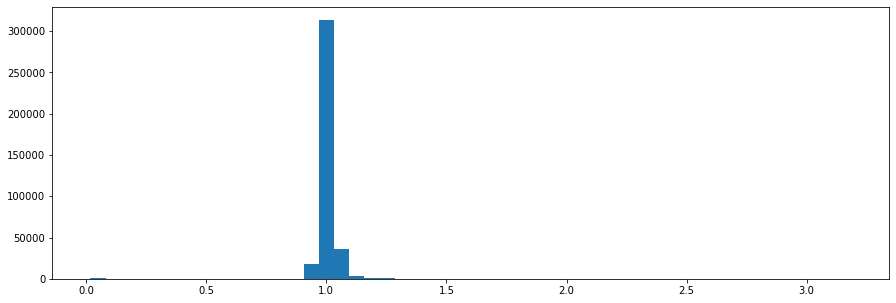

In [61]:
#Distribution of the accelerometer mean (in every 60 secs) values
plt.figure(figsize = (15, 5))
plt.hist(raw_acc["raw_acc:magnitude_stats:mean"], bins = 50) #Most values are around 1.0
plt.show()

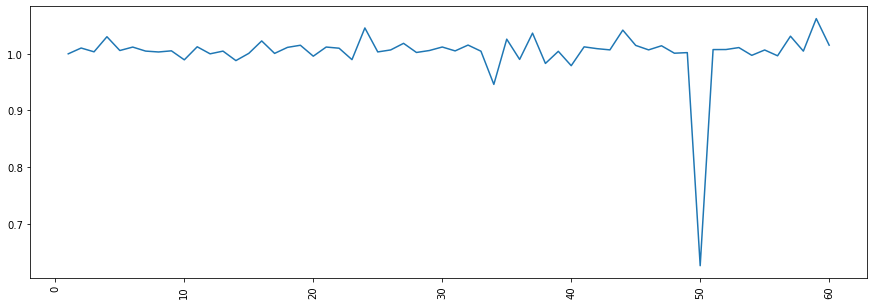

In [62]:
#Distribution based on user
raw_acc_by_user = raw_acc.groupby("id", as_index=False).mean()
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_by_user["id"], raw_acc_by_user["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

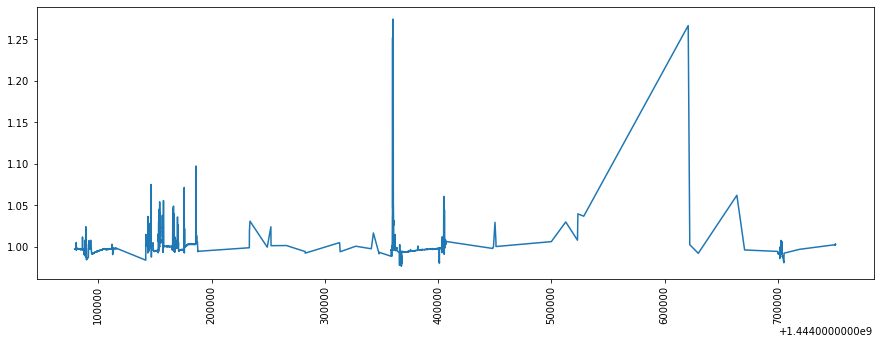

In [63]:
#Distribution over time for first user
raw_acc_user_2 = raw_acc[raw_acc["id"] == 1]
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_user_2["timestamp"], raw_acc_user_2["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

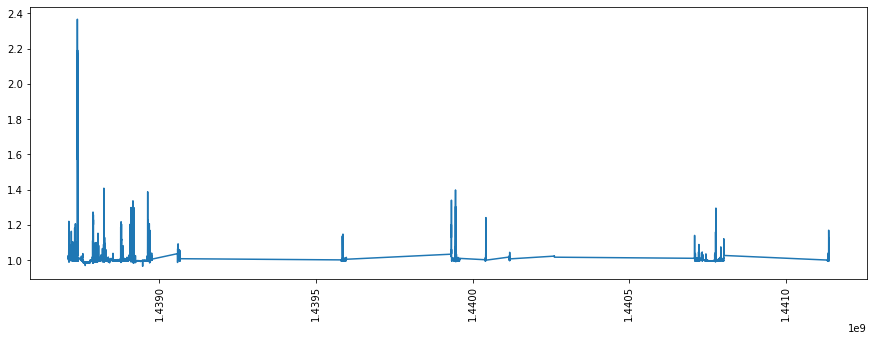

In [64]:
#Distribution over time for second user
raw_acc_user_1 = raw_acc[raw_acc["id"] == 2]
plt.figure(figsize = (15, 5))
plt.plot(raw_acc_user_1["timestamp"], raw_acc_user_1["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

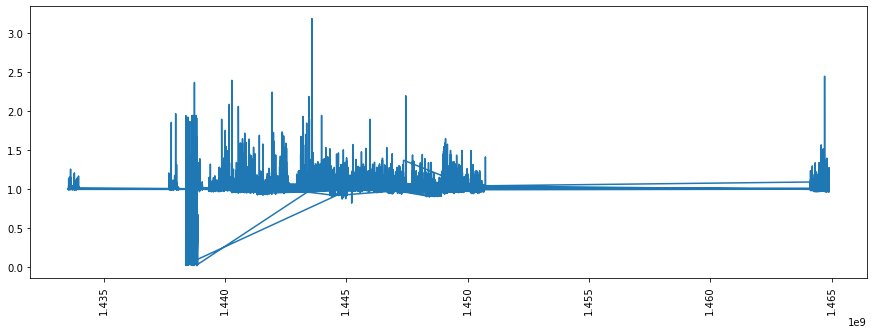

In [65]:
#Distribution over time for all users 
#does not make sense, since different time values for each user
plt.figure(figsize = (15, 5))
plt.plot(raw_acc["timestamp"], raw_acc["raw_acc:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

## Gyroscope

In [66]:
#Extracting the mean calculations every 60 secs for each sensor
proc_gyro_cols = ["uuid", "id", "timestamp"]
for col in sensor_data.columns:
    if col.startswith("proc_gyro"):
        proc_gyro_cols.append(col)
proc_gyro_cols

['uuid',
 'id',
 'timestamp',
 'proc_gyro:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:std',
 'proc_gyro:magnitude_stats:moment3',
 'proc_gyro:magnitude_stats:moment4',
 'proc_gyro:magnitude_stats:percentile25',
 'proc_gyro:magnitude_stats:percentile50',
 'proc_gyro:magnitude_stats:percentile75',
 'proc_gyro:magnitude_stats:value_entropy',
 'proc_gyro:magnitude_stats:time_entropy',
 'proc_gyro:magnitude_spectrum:log_energy_band0',
 'proc_gyro:magnitude_spectrum:log_energy_band1',
 'proc_gyro:magnitude_spectrum:log_energy_band2',
 'proc_gyro:magnitude_spectrum:log_energy_band3',
 'proc_gyro:magnitude_spectrum:log_energy_band4',
 'proc_gyro:magnitude_spectrum:spectral_entropy',
 'proc_gyro:magnitude_autocorrelation:period',
 'proc_gyro:magnitude_autocorrelation:normalized_ac',
 'proc_gyro:3d:mean_x',
 'proc_gyro:3d:mean_y',
 'proc_gyro:3d:mean_z',
 'proc_gyro:3d:std_x',
 'proc_gyro:3d:std_y',
 'proc_gyro:3d:std_z',
 'proc_gyro:3d:ro_xy',
 'proc_gyro:3d:ro_xz',
 'proc_gyro:3d:ro_yz'

In [67]:
proc_gyro = sensor_data[proc_gyro_cols]
proc_gyro

,uuid,id,timestamp,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,0.002558,0.001510,0.001832,0.002531,0.001526,0.002196,0.003230,2.236059,6.532865,5.149616,2.818909,3.757026,2.952941,4.312930,1.766920,4.193949,0.107787,0.000412,0.000448,-0.000541,0.001705,0.001987,0.001144,-0.372543,0.175125,-0.033004
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,0.002279,0.001256,0.001519,0.002183,0.001424,0.002035,0.002880,2.028993,6.550010,4.945471,2.153223,2.719359,3.117012,4.355961,1.455363,1.323078,0.140106,0.000091,-0.000082,0.000002,0.001576,0.001746,0.001105,-0.425875,0.138763,0.047049
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,0.002579,0.001790,0.002418,0.003395,0.001350,0.002088,0.003187,1.975138,6.492197,4.878255,3.366933,3.824890,3.056752,4.501969,1.848755,1.323074,0.160500,0.000011,0.000179,0.000026,0.001714,0.002244,0.001360,-0.506993,0.181114,-0.214371
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,0.002497,0.001577,0.001944,0.002715,0.001415,0.002106,0.003102,2.094385,6.513228,4.917277,3.325518,3.286417,2.773796,4.546137,1.726047,0.524236,0.091489,-0.000006,-0.000020,0.000042,0.001347,0.002357,0.001164,-0.565952,0.108946,-0.138670
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,0.105566,0.340573,0.582097,0.825209,0.001867,0.003018,0.006146,0.665061,4.638178,6.291532,3.912588,3.541116,4.298033,4.824680,3.425678,0.000000,0.000000,-0.001074,-0.000934,0.006930,0.099609,0.322466,0.114795,-0.318971,0.097856,-0.353731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,0.020239,0.131169,0.297011,0.458977,0.003924,0.005372,0.007116,0.151502,4.235067,4.579972,5.001542,5.603289,4.951970,5.334684,4.750381,6.178258,0.081873,-0.000377,0.000121,-0.009534,0.003632,0.003682,0.132276,-0.047839,0.065722,0.108646
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,0.007604,0.005517,0.010335,0.016889,0.004601,0.006533,0.009371,1.252950,6.510129,5.201593,3.525524,3.616272,3.256231,4.196058,1.962062,4.428477,0.074647,0.000029,0.000529,-0.000764,0.005531,0.005856,0.004745,-0.248947,-0.056549,0.082608
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,1.012825,1.446485,1.951552,2.592079,0.118451,0.422182,1.170368,1.549467,5.936993,5.786401,3.829856,3.862398,3.563287,3.896671,2.312802,0.000000,0.000000,0.018604,0.138204,-0.040052,0.898456,1.284445,0.800039,0.191768,-0.062184,-0.123859
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,2.140000,1.581337,1.958200,2.738973,0.963640,1.717493,3.017175,2.176307,6.448411,5.401374,3.955306,4.443023,2.885685,3.208792,2.113920,2.651518,0.191987,0.036168,0.029044,0.133833,1.176626,1.676329,1.692819,-0.201934,0.434596,0.121177


In [68]:
proc_gyro["proc_gyro:magnitude_stats:mean"].describe()

count    359912.000000
mean          0.174108
std           0.477457
min           0.000705
25%           0.002914
50%           0.008987
75%           0.103023
max          34.906977
Name: proc_gyro:magnitude_stats:mean, dtype: float64

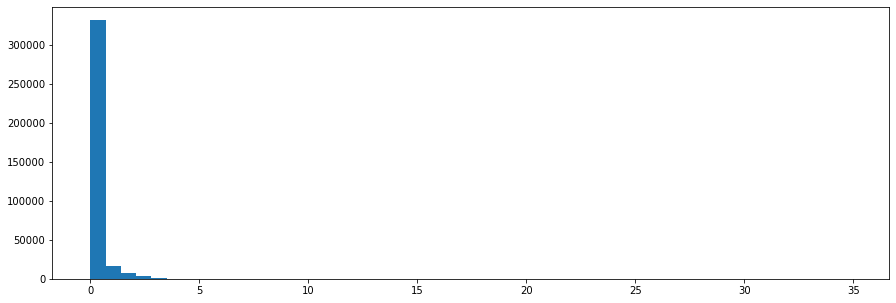

In [69]:
#Distribution of the gyroscope mean (in every 60 secs) values
plt.figure(figsize = (15, 5))
plt.hist(proc_gyro["proc_gyro:magnitude_stats:mean"], bins = 50) #Most values are around 0.1
plt.show()

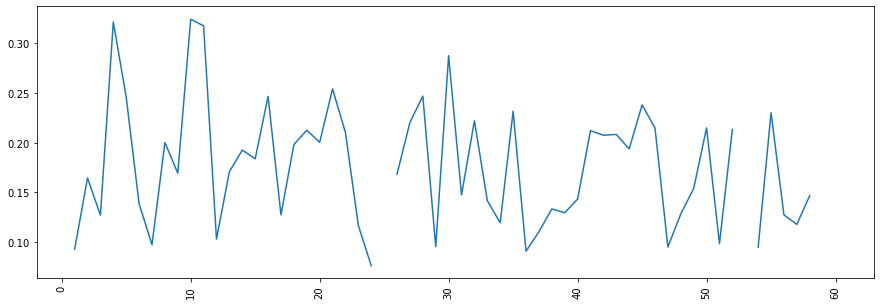

In [70]:
#Distribution based on user
proc_gyro_by_user = proc_gyro.groupby("id", as_index=False).mean()
plt.figure(figsize = (15, 5))
plt.plot(proc_gyro_by_user["id"], proc_gyro_by_user["proc_gyro:magnitude_stats:mean"])
plt.xticks(rotation = 90)
plt.show()

In [71]:
#Do for rest of the features

# Labels

In [72]:
#Extracting features and timestamp

id_time_cols = sensor_data.iloc[:, 0:3]
l = sensor_data.iloc[:, 228:279]
labels = pd.concat([id_time_cols, l], axis = 1)
# print(features.columns[3:29])
labels

,uuid,id,timestamp,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Separating features into the 4 different types

## User Reports

In [74]:
user_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").isupper():
        user_labels_cols.append(col)
user_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:LYING_DOWN',
 'label:SITTING',
 'label:BICYCLING',
 'label:SLEEPING',
 'label:LAB_WORK',
 'label:IN_CLASS',
 'label:IN_A_MEETING',
 'label:IN_A_CAR',
 'label:ON_A_BUS',
 'label:DRIVE_-_I_M_THE_DRIVER',
 'label:DRIVE_-_I_M_A_PASSENGER',
 'label:PHONE_IN_POCKET',
 'label:COOKING',
 'label:SHOPPING',
 'label:STROLLING',
 'label:DRINKING__ALCOHOL_',
 'label:BATHING_-_SHOWER',
 'label:CLEANING',
 'label:DOING_LAUNDRY',
 'label:WASHING_DISHES',
 'label:WATCHING_TV',
 'label:SURFING_THE_INTERNET',
 'label:AT_A_PARTY',
 'label:AT_A_BAR',
 'label:SINGING',
 'label:TALKING',
 'label:COMPUTER_WORK',
 'label:EATING',
 'label:TOILET',
 'label:GROOMING',
 'label:DRESSING',
 'label:AT_THE_GYM',
 'label:STAIRS_-_GOING_UP',
 'label:STAIRS_-_GOING_DOWN',
 'label:ELEVATOR',
 'label:AT_SCHOOL',
 'label:PHONE_IN_HAND',
 'label:PHONE_IN_BAG',
 'label:PHONE_ON_TABLE',
 'label:WITH_CO-WORKERS',
 'label:WITH_FRIENDS']

In [75]:
user_labels = labels[user_labels_cols]
user_labels

,uuid,id,timestamp,label:LYING_DOWN,label:SITTING,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:PHONE_IN_POCKET,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,0.0,1.0,NaN,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,0.0,1.0,NaN,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,0.0,1.0,NaN,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,0.0,1.0,NaN,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,0.0,1.0,NaN,0.0,NaN,0.0,1.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
user_labels.describe()

,id,timestamp,label:LYING_DOWN,label:SITTING,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:PHONE_IN_POCKET,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS
count,377346.000000,3.773460e+05,303723.000000,306594.000000,135183.000000,285268.000000,49395.000000,109063.000000,231213.000000,174696.000000,169032.000000,162264.000000,131087.000000,134364.000000,209346.000000,138793.000000,53761.000000,70783.00000,201120.000000,159420.000000,73972.000000,136474.000000,196352.000000,192683.000000,54563.000000,33220.000000,25117.000000,279546.000000,237559.000000,296481.000000,220273.000000,198800.000000,207908.000000,44393.000000,94629.000000,94415.000000,71196.000000,259164.000000,141703.000000,92462.000000,162423.000000,112064.000000,165414.000000
mean,30.494096,1.445839e+09,0.343109,0.444745,0.037135,0.291147,0.077903,0.056023,0.022287,0.034820,0.010613,0.049148,0.019270,0.174161,0.019246,0.013264,0.014992,0.02057,0.010377,0.023874,0.007516,0.008998,0.067792,0.100767,0.026941,0.016586,0.025919,0.129828,0.160301,0.055970,0.012053,0.015412,0.010740,0.025928,0.008433,0.008198,0.002809,0.163337,0.102842,0.110326,0.708256,0.055540,0.149546
std,15.996513,5.907009e+06,0.474748,0.496938,0.189093,0.454292,0.268021,0.229967,0.147615,0.183325,0.102473,0.216178,0.137472,0.379249,0.137388,0.114405,0.121523,0.14194,0.101337,0.152657,0.086371,0.094431,0.251388,0.301020,0.161913,0.127718,0.158896,0.336115,0.366886,0.229864,0.109124,0.123187,0.103078,0.158921,0.091443,0.090171,0.052927,0.369673,0.303753,0.313298,0.454567,0.229032,0.356627
min,1.000000,1.433537e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.441438e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,1.444974e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,44.000000,1.448696e+09,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,60.000000,1.464899e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.

In [77]:
# Counting the number of 0s and 1s for each label
user_val_counts = user_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
# 0s more than 1s for all labels except label:PHONE_ON_TABLE
#Users mostly SITTING/PHONE_ON_TABLE/LYING_DOWN/SLEEPING
user_val_counts

,0.0,1.0
label:SITTING,170238,136356
label:PHONE_ON_TABLE,47386,115037
label:LYING_DOWN,199513,104210
label:SLEEPING,202213,83055
label:AT_SCHOOL,216833,42331
label:COMPUTER_WORK,199478,38081
label:TALKING,243253,36293
label:WITH_FRIENDS,140677,24737
label:PHONE_IN_POCKET,110963,23401
label:SURFING_THE_INTERNET,173267,19416


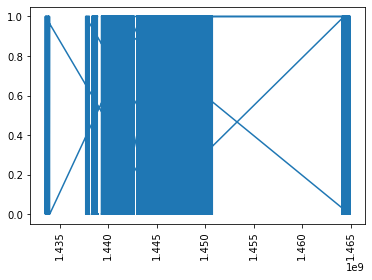

In [78]:
# user_labels_cols = user_val_counts.index[:14]
# pos = list(range(1, len(user_labels_cols)+1))
# plt.figure(figsize = (30, 30))
# for i in range(len(user_labels_cols)):
#     plt.subplot(7, 2, pos[i])
#     plt.bar(user_labels[user_labels_cols[i]], user_labels["timestamp"])
#     plt.xticks(rotation = 90, fontsize = 25)
#     plt.yticks(fontsize = 25)
#     plt.xlabel("label", fontsize = 25)
#     plt.ylabel("Timestamp", fontsize = 25)
#     plt.title(user_labels_cols[i], fontsize = 30)
# plt.tight_layout()
# plt.show()
plt.plot(user_labels["timestamp"], user_labels["label:SITTING"])
plt.xticks(rotation = 90)
plt.show()

## Fixed Version

In [79]:
fixed_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").startswith("FIX_"):
        fixed_labels_cols.append(col)
fixed_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:FIX_walking',
 'label:FIX_running',
 'label:FIX_restaurant']

In [80]:
fixed_labels = labels[fixed_labels_cols]
fixed_labels

,uuid,id,timestamp,label:FIX_walking,label:FIX_running,label:FIX_restaurant
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,0.0,NaN,NaN
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,0.0,NaN,NaN
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,0.0,NaN,NaN
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,0.0,NaN,NaN
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,0.0,NaN,NaN
...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,NaN,NaN,NaN
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,NaN,NaN,NaN
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,NaN,NaN,NaN
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,NaN,NaN,NaN


In [81]:
# Counting the number of 0s and 1s for each label
fixed_val_counts = fixed_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
# Looks like walking is found to be among the top 10 things users do after fixing
fixed_val_counts

,0.0,1.0
label:FIX_walking,284458,22136
label:FIX_restaurant,155484,2098
label:FIX_running,139780,1090


In [82]:
plt.bar(fixed_labels["label:FIX_walking"], fixed_labels["timestamp"])
plt.show()

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000018C8B9BFEE0> (for post_execute):


KeyboardInterrupt: 

## Logical Labels

In [83]:
log_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").startswith("OR_"):
        log_labels_cols.append(col)
log_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:OR_indoors',
 'label:OR_outside',
 'label:OR_exercise',
 'label:OR_standing']

In [84]:
log_labels = labels[log_labels_cols]
log_labels

,uuid,id,timestamp,label:OR_indoors,label:OR_outside,label:OR_exercise,label:OR_standing
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,NaN,NaN,NaN,0.0
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,NaN,NaN,NaN,0.0
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,NaN,NaN,NaN,0.0
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,NaN,NaN,NaN,0.0
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,NaN,NaN,NaN,NaN
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,NaN,NaN,NaN,NaN
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,NaN,NaN,NaN,NaN
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,NaN,NaN,NaN,NaN


In [85]:
# Counting the number of 0s and 1s for each label
log_val_counts = log_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
# 0s more than 1s for all labels except label:OR_indoors
# Users mostly indoors than outside
log_val_counts

,0.0,1.0
label:OR_indoors,12114,184692
label:OR_standing,268812,37782
label:OR_outside,139384,12114
label:OR_exercise,232756,8081


## Location Labels

In [86]:
loc_labels_cols = ["uuid", "id", "timestamp"]
for col in labels.columns:
    if col.strip("label:").startswith("LOC_"):
        loc_labels_cols.append(col)
loc_labels_cols

['uuid',
 'id',
 'timestamp',
 'label:LOC_main_workplace',
 'label:LOC_home',
 'label:LOC_beach']

In [87]:
loc_labels = labels[loc_labels_cols]
loc_labels

,uuid,id,timestamp,label:LOC_main_workplace,label:LOC_home,label:LOC_beach
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,1.0,0.0,NaN
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,1.0,0.0,NaN
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,1.0,0.0,NaN
3,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079341,1.0,0.0,NaN
4,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079431,1.0,0.0,NaN
...,...,...,...,...,...,...
377341,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234779,NaN,NaN,NaN
377342,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234839,NaN,NaN,NaN
377343,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234899,NaN,NaN,NaN
377344,FDAA70A1-42A3-4E3F-9AE3-3FDA412E03BF,60,1444234959,NaN,NaN,NaN


In [88]:
# Counting the number of 0s and 1s for each label
loc_val_counts = loc_labels.iloc[:, 3:].apply(pd.Series.value_counts).transpose().sort_values(by = 1.0, ascending = False)
loc_val_counts

,0.0,1.0
label:LOC_home,202442,152892
label:LOC_main_workplace,167783,33944
label:LOC_beach,57059,585


# Extracting only important columns and cleaning

In [95]:
#Extracing sensors with features calculated using mean
imp_cols = ["uuid", "id", "timestamp"]
imp_cols.extend(["watch_heading:mean_cos", "location_quick_features:lat_change", "location_quick_features:long_change", "audio_properties:max_abs_value", "discrete:app_state:is_active", "discrete:app_state:is_background", "discrete:battery_state:is_charging", "discrete:on_the_phone:is_True", "discrete:ringer_mode:is_normal", "discrete:wifi_status:is_reachable_via_wifi"])
for col in sensor_data.columns:
    if col.endswith("mean"):
        imp_cols.append(col)
    if col.startswith("location:"):
        imp_cols.append(col)
    if col.startswith("lf_"):
        imp_cols.append(col)
    if col.startswith("discrete:time_of_day"):
        imp_cols.append(col)
    if col.startswith("label"):
        imp_cols.append(col)
print(len(imp_cols))
imp_cols

109


['uuid',
 'id',
 'timestamp',
 'watch_heading:mean_cos',
 'location_quick_features:lat_change',
 'location_quick_features:long_change',
 'audio_properties:max_abs_value',
 'discrete:app_state:is_active',
 'discrete:app_state:is_background',
 'discrete:battery_state:is_charging',
 'discrete:on_the_phone:is_True',
 'discrete:ringer_mode:is_normal',
 'discrete:wifi_status:is_reachable_via_wifi',
 'raw_acc:magnitude_stats:mean',
 'proc_gyro:magnitude_stats:mean',
 'raw_magnet:magnitude_stats:mean',
 'watch_acceleration:magnitude_stats:mean',
 'location:num_valid_updates',
 'location:log_latitude_range',
 'location:log_longitude_range',
 'location:min_altitude',
 'location:max_altitude',
 'location:min_speed',
 'location:max_speed',
 'location:best_horizontal_accuracy',
 'location:best_vertical_accuracy',
 'location:diameter',
 'location:log_diameter',
 'audio_naive:mfcc0:mean',
 'audio_naive:mfcc1:mean',
 'audio_naive:mfcc2:mean',
 'audio_naive:mfcc3:mean',
 'audio_naive:mfcc4:mean',
 'aud

In [96]:
imp_sensor_data = sensor_data[imp_cols]
imp_sensor_data

,uuid,id,timestamp,watch_heading:mean_cos,location_quick_features:lat_change,location_quick_features:long_change,audio_properties:max_abs_value,discrete:app_state:is_active,discrete:app_state:is_background,discrete:battery_state:is_charging,discrete:on_the_phone:is_True,discrete:ringer_mode:is_normal,discrete:wifi_status:is_reachable_via_wifi,raw_acc:magnitude_stats:mean,proc_gyro:magnitude_stats:mean,raw_magnet:magnitude_stats:mean,watch_acceleration:magnitude_stats:mean,location:num_valid_updates,location:log_latitude_range,location:log_longitude_range,location:min_altitude,location:max_altitude,location:min_speed,location:max_speed,location:best_horizontal_accuracy,location:best_vertical_accuracy,location:diameter,location:log_diameter,audio_naive:mfcc0:mean,audio_naive:mfcc1:mean,audio_naive:mfcc2:mean,audio_naive:mfcc3:mean,audio_naive:mfcc4:mean,audio_naive:mfcc5:mean,audio_naive:mfcc6:mean,audio_naive:mfcc7:mean,audio_naive:mfcc8:mean,audio_naive:mfcc9:mean,audio_naive:mfcc10:mean,audio_naive:mfcc11:mean,audio_naive:mfcc12:mean,lf_measurements:light,lf_measurements:pressure,lf_measurements:proximity_cm,lf_measurements:proximity,lf_measurements:relative_humidity,lf_measurements:battery_level,lf_measurements:screen_brightness,lf_measurements:temperature_ambient,discrete:time_of_day:between0and6,discrete:time_of_day:between3and9,discrete:time_of_day:between6and12,discrete:time_of_day:between9and15,discrete:time_of_day:between12and18,discrete:time_of_day:between15and21,discrete:time_of_day:between18and24,discrete:time_of_day:between21and3,label:LYING_DOWN,label:SITTING,label:FIX_walking,label:FIX_running,label:BICYCLING,label:SLEEPING,label:LAB_WORK,label:IN_CLASS,label:IN_A_MEETING,label:LOC_main_workplace,label:OR_indoors,label:OR_outside,label:IN_A_CAR,label:ON_A_BUS,label:DRIVE_-_I_M_THE_DRIVER,label:DRIVE_-_I_M_A_PASSENGER,label:LOC_home,label:FIX_restaurant,label:PHONE_IN_POCKET,label:OR_exercise,label:COOKING,label:SHOPPING,label:STROLLING,label:DRINKING__ALCOHOL_,label:BATHING_-_SHOWER,label:CLEANING,label:DOING_LAUNDRY,label:WASHING_DISHES,label:WATCHING_TV,label:SURFING_THE_INTERNET,label:AT_A_PARTY,label:AT_A_BAR,label:LOC_beach,label:SINGING,label:TALKING,label:COMPUTER_WORK,label:EATING,label:TOILET,label:GROOMING,label:DRESSING,label:AT_THE_GYM,label:STAIRS_-_GOING_UP,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079161,NaN,-0.000067,-0.000073,-2.605413,0.0,0.0,1.0,0.0,0.0,1.0,0.996815,0.002558,618.751929,1032.508157,4.0,0.064895,0.070473,108.230255,108.239944,NaN,NaN,65.0,10.0,10.102999,2.312832,-4.219657,-0.012806,-1.298291,0.094373,-1.220977,-0.851300,-1.656516,-0.898563,-0.503573,-0.518072,-0.907876,-0.681724,-0.683515,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
1,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079221,NaN,-0.000021,0.000013,-2.536529,1.0,0.0,1.0,0.0,0.0,1.0,0.996864,0.002279,618.834334,1031.283026,7.0,0.072793,0.061653,108.218773,108.237328,NaN,NaN,65.0,10.0,9.611984,2.263011,-7.505606,1.294372,-0.745550,-0.052791,-1.220453,-0.822848,-1.559542,-0.835154,-0.665443,-0.580521,-0.865482,-0.703950,-0.718397,NaN,NaN,NaN,0.0,NaN,0.46,0.381436,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,NaN,0.0,1.0,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,1.0,NaN,2
2,00EABED2-271D-49D8-B599-1D4A09240601,1,1444079281,NaN,-0.000005,0.000003,-2.419184,1.0,0.0,1.0,0.0,0.0,1.0,0.996825,0.002579,618.632716,1031.643125,8.0,0.004599,0.004253,108.276825,108.347427,NaN,NaN,65.0,10.0,0

In [102]:
#Dropping columns that have NaN values that are more than 50% of the number of rows (then the 0s and 1)
print(len(imp_sensor_data)/2)
# imp_sensor_data.iloc[:, :50].isna().sum()
imp_sensor_data.iloc[:, 50:].isna().sum()

188673.0


discrete:time_of_day:between3and9           0
discrete:time_of_day:between6and12          0
discrete:time_of_day:between9and15          0
discrete:time_of_day:between12and18         0
discrete:time_of_day:between15and21         0
discrete:time_of_day:between18and24         0
discrete:time_of_day:between21and3          0
label:LYING_DOWN                        73623
label:SITTING                           70752
label:FIX_walking                       70752
label:FIX_running                      236476
label:BICYCLING                        242163
label:SLEEPING                          92078
label:LAB_WORK                         327951
label:IN_CLASS                         268283
label:IN_A_MEETING                     146133
label:LOC_main_workplace               175619
label:OR_indoors                       180540
label:OR_outside                       225848
label:IN_A_CAR                         202650
label:ON_A_BUS                         208314
label:DRIVE_-_I_M_THE_DRIVER      

In [ ]:
#Dropping rows with NaNs

# Relationship Between Features and Labels

In [89]:
sensor_data.corr()

,id,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energ